In [152]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [153]:
from utils import FunctionDepthExperiment
import seaborn as sns
from numpy import median
from scipy.stats import median_test, f_oneway

In [154]:
exp = FunctionDepthExperiment()

In [172]:
exp.run_experiment(participant='will', N_var=6, N_trials=10, dummy=True)

FunctionBasicExperiment(experiment='{"trials": [{"program": "k = 1 - 7\\ng = k - 8\\nw = 7 - 4\\nq = 2 + w\\nd…

In [164]:
df = exp.results()

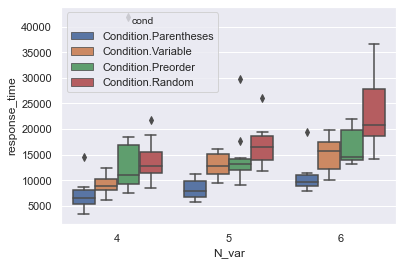

In [165]:
sns.boxplot(
    data=exp.results(), x='N_var', y='response_time', hue='cond', hue_order=list(map(str, exp.Condition)))

In [166]:
rt = exp.results().groupby(['N_var', 'cond']).median().response_time
print(rt[5] - rt[4])
print(rt[6] - rt[5])

cond
Condition.Parentheses    1523.5
Condition.Preorder       2219.0
Condition.Random         3662.0
Condition.Variable       3863.5
Name: response_time, dtype: float64
cond
Condition.Parentheses    1760.0
Condition.Preorder       1368.0
Condition.Random         4434.5
Condition.Variable       2930.0
Name: response_time, dtype: float64


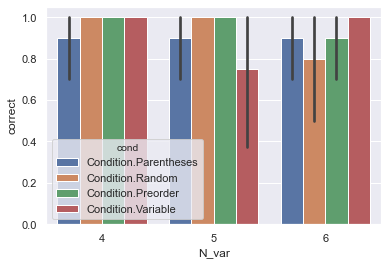

In [167]:
sns.barplot(data=exp.results(), x='N_var', y='correct', hue='cond')

In [178]:
rt = exp.results().groupby(['N_var', 'cond']).median().response_time
print(rt.loc[:,'Condition.Random'] / rt.loc[:,'Condition.Variable'])

N_var
4    1.439966
5    1.290797
6    1.332419
Name: response_time, dtype: float64


In [177]:
exp.results().groupby(['N_var']).apply(
    lambda data: median_test(data[data.cond == 'Condition.Random'].response_time, 
                             data[data.cond == 'Condition.Variable'].response_time)[1])

N_var
4    0.154729
5    0.154729
6    0.154729
dtype: float64